# Project: The Growing Success of Video Games

## Research Question: Can independent game studios can succeed, or only the top publishers are financially viable?

#### To answer the query, I'm analyzing the top 5000 best-selling games and check
#### the percentage of games not made by top publishers and find it's growth.

In [920]:
#Importing relevant packages

import pandas as pd
import seaborn as sb
import matplotlib as mtl
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

#### I downloaded database of best selling games
#### Source: https://www.kaggle.com/datasets/gsimonx37/vgchartz

In [921]:
# importing database
v = pd.read_csv('data/vgchartz.csv')

#### Read the data

In [922]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64005 entries, 0 to 64004
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       64005 non-null  object 
 1   date       57073 non-null  object 
 2   platform   64005 non-null  object 
 3   publisher  64005 non-null  object 
 4   developer  63988 non-null  object 
 5   shipped    4439 non-null   float64
 6   total      18922 non-null  float64
 7   america    12637 non-null  float64
 8   europe     12824 non-null  float64
 9   japan      6726 non-null   float64
 10  other      15128 non-null  float64
 11  vgc        2285 non-null   float64
 12  critic     6628 non-null   float64
 13  user       414 non-null    float64
dtypes: float64(9), object(5)
memory usage: 6.8+ MB


In [923]:
v.head()

,name,date,platform,publisher,developer,shipped,total,america,europe,japan,other,vgc,critic,user
0,Tetris,1988-01-01,Series,The Tetris Company,Alexey Pajitnov,520.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pokemon,1998-09-28,Series,Nintendo,Game Freak,481.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Call of Duty,2003-10-29,Series,Activision,Infinity Ward,425.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grand Theft Auto,1998-03-27,Series,Rockstar Games,Rockstar North,410.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Super Mario,1983-07-20,Series,Nintendo,Nintendo,408.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cleaning data: changing date to Datetime

In [924]:
v.date = pd.to_datetime(v['date'], yearfirst=True, format = '%Y-%m-%d')

In [830]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64005 entries, 0 to 64004
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       64005 non-null  object        
 1   date       57073 non-null  datetime64[ns]
 2   platform   64005 non-null  object        
 3   year       57073 non-null  float64       
 4   month      0 non-null      object        
 5   day        57073 non-null  float64       
 6   publisher  64005 non-null  object        
 7   developer  63988 non-null  object        
 8   shipped    4439 non-null   float64       
 9   total      18922 non-null  float64       
 10  america    12637 non-null  float64       
 11  europe     12824 non-null  float64       
 12  japan      6726 non-null   float64       
 13  other      15128 non-null  float64       
 14  vgc        2285 non-null   float64       
 15  critic     6628 non-null   float64       
 16  user       414 non-null    float64      

In [925]:
#checking statistics
v.describe()

,date,shipped,total,america,europe,japan,other,vgc,critic,user
count,57073,4439.000000,18922.000000,12637.000000,12824.000000,6726.000000,15128.000000,2285.000000,6628.000000,414.000000
mean,2006-10-26 13:30:24.883920640,4.733956,0.349113,0.264740,0.149472,0.102281,0.043041,7.093567,7.215510,8.059662
min,1970-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2001-03-15 00:00:00,0.230000,0.030000,0.050000,0.010000,0.020000,0.000000,6.000000,6.400000,7.500000
50%,2008-09-09 00:00:00,1.000000,0.120000,0.120000,0.040000,0.040000,0.010000,7.300000,7.500000,8.500000
75%,2012-12-20 00:00:00,2.875000,0.340000,0.280000,0.140000,0.120000,0.030000,8.200000,8.300000,9.100000
max,2024-12-31 00:00:00,520.000000,20.320000,9.760000,9.850000,2.130000,3.120000,10.000000,10.000000,10.000000
std,NaN,21.082158,0.807462,0.494787,0.392653,0.168811,0.126643,1.546588,1.457813,1.667331


#### Thirdly, I'll answer the questions suggested by the dataset's creator to understand better video game growth and publishers.
    1.in what year did the active growth in the number of video games produced begin?
    2.What year was the most successful from this point of view?

In [926]:
#Adding Year column from to answer the question

v.insert(3,'year', v['date'].dt.year)

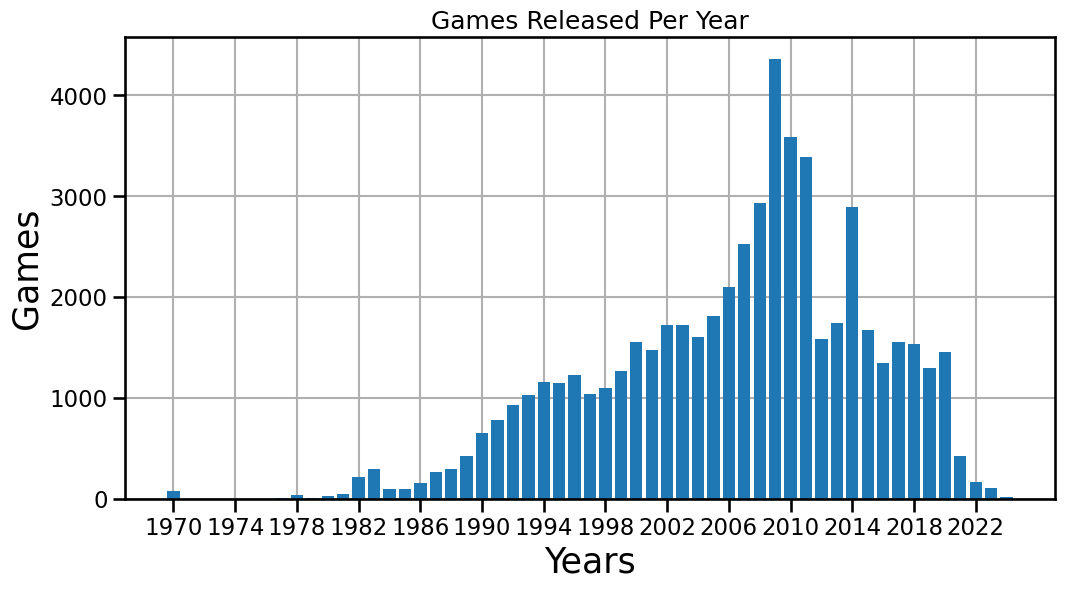

In [927]:
#grouping year to count how many games were in each year
year = v.groupby('year').name.count()
#form a graph of video games released per year
plt.figure(figsize=(12,6))
plt.bar(year.index, year.values)
plt.xlabel('Years', fontsize=25)
plt.ylabel('Games', fontsize=25)
plt.title('Games Released Per Year')
plt.xticks(ticks=[1970,1974,1978,1982,1986,1990,1994,1998,2002,2006,2010,2014,2018,2022])
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.show()

#### While consistent growth started from 1986, active growth started in 1989, and 2008 had the highest growth rate, leading to 2009's peak.

    3. What can you conclude if you look at the number of video games released by country?

In [928]:
#Reworking dataset for quick pairplot assessment
v2 = v[['name', 'year', 'publisher', 'total', 'america', 'europe', 'japan', 'other']]

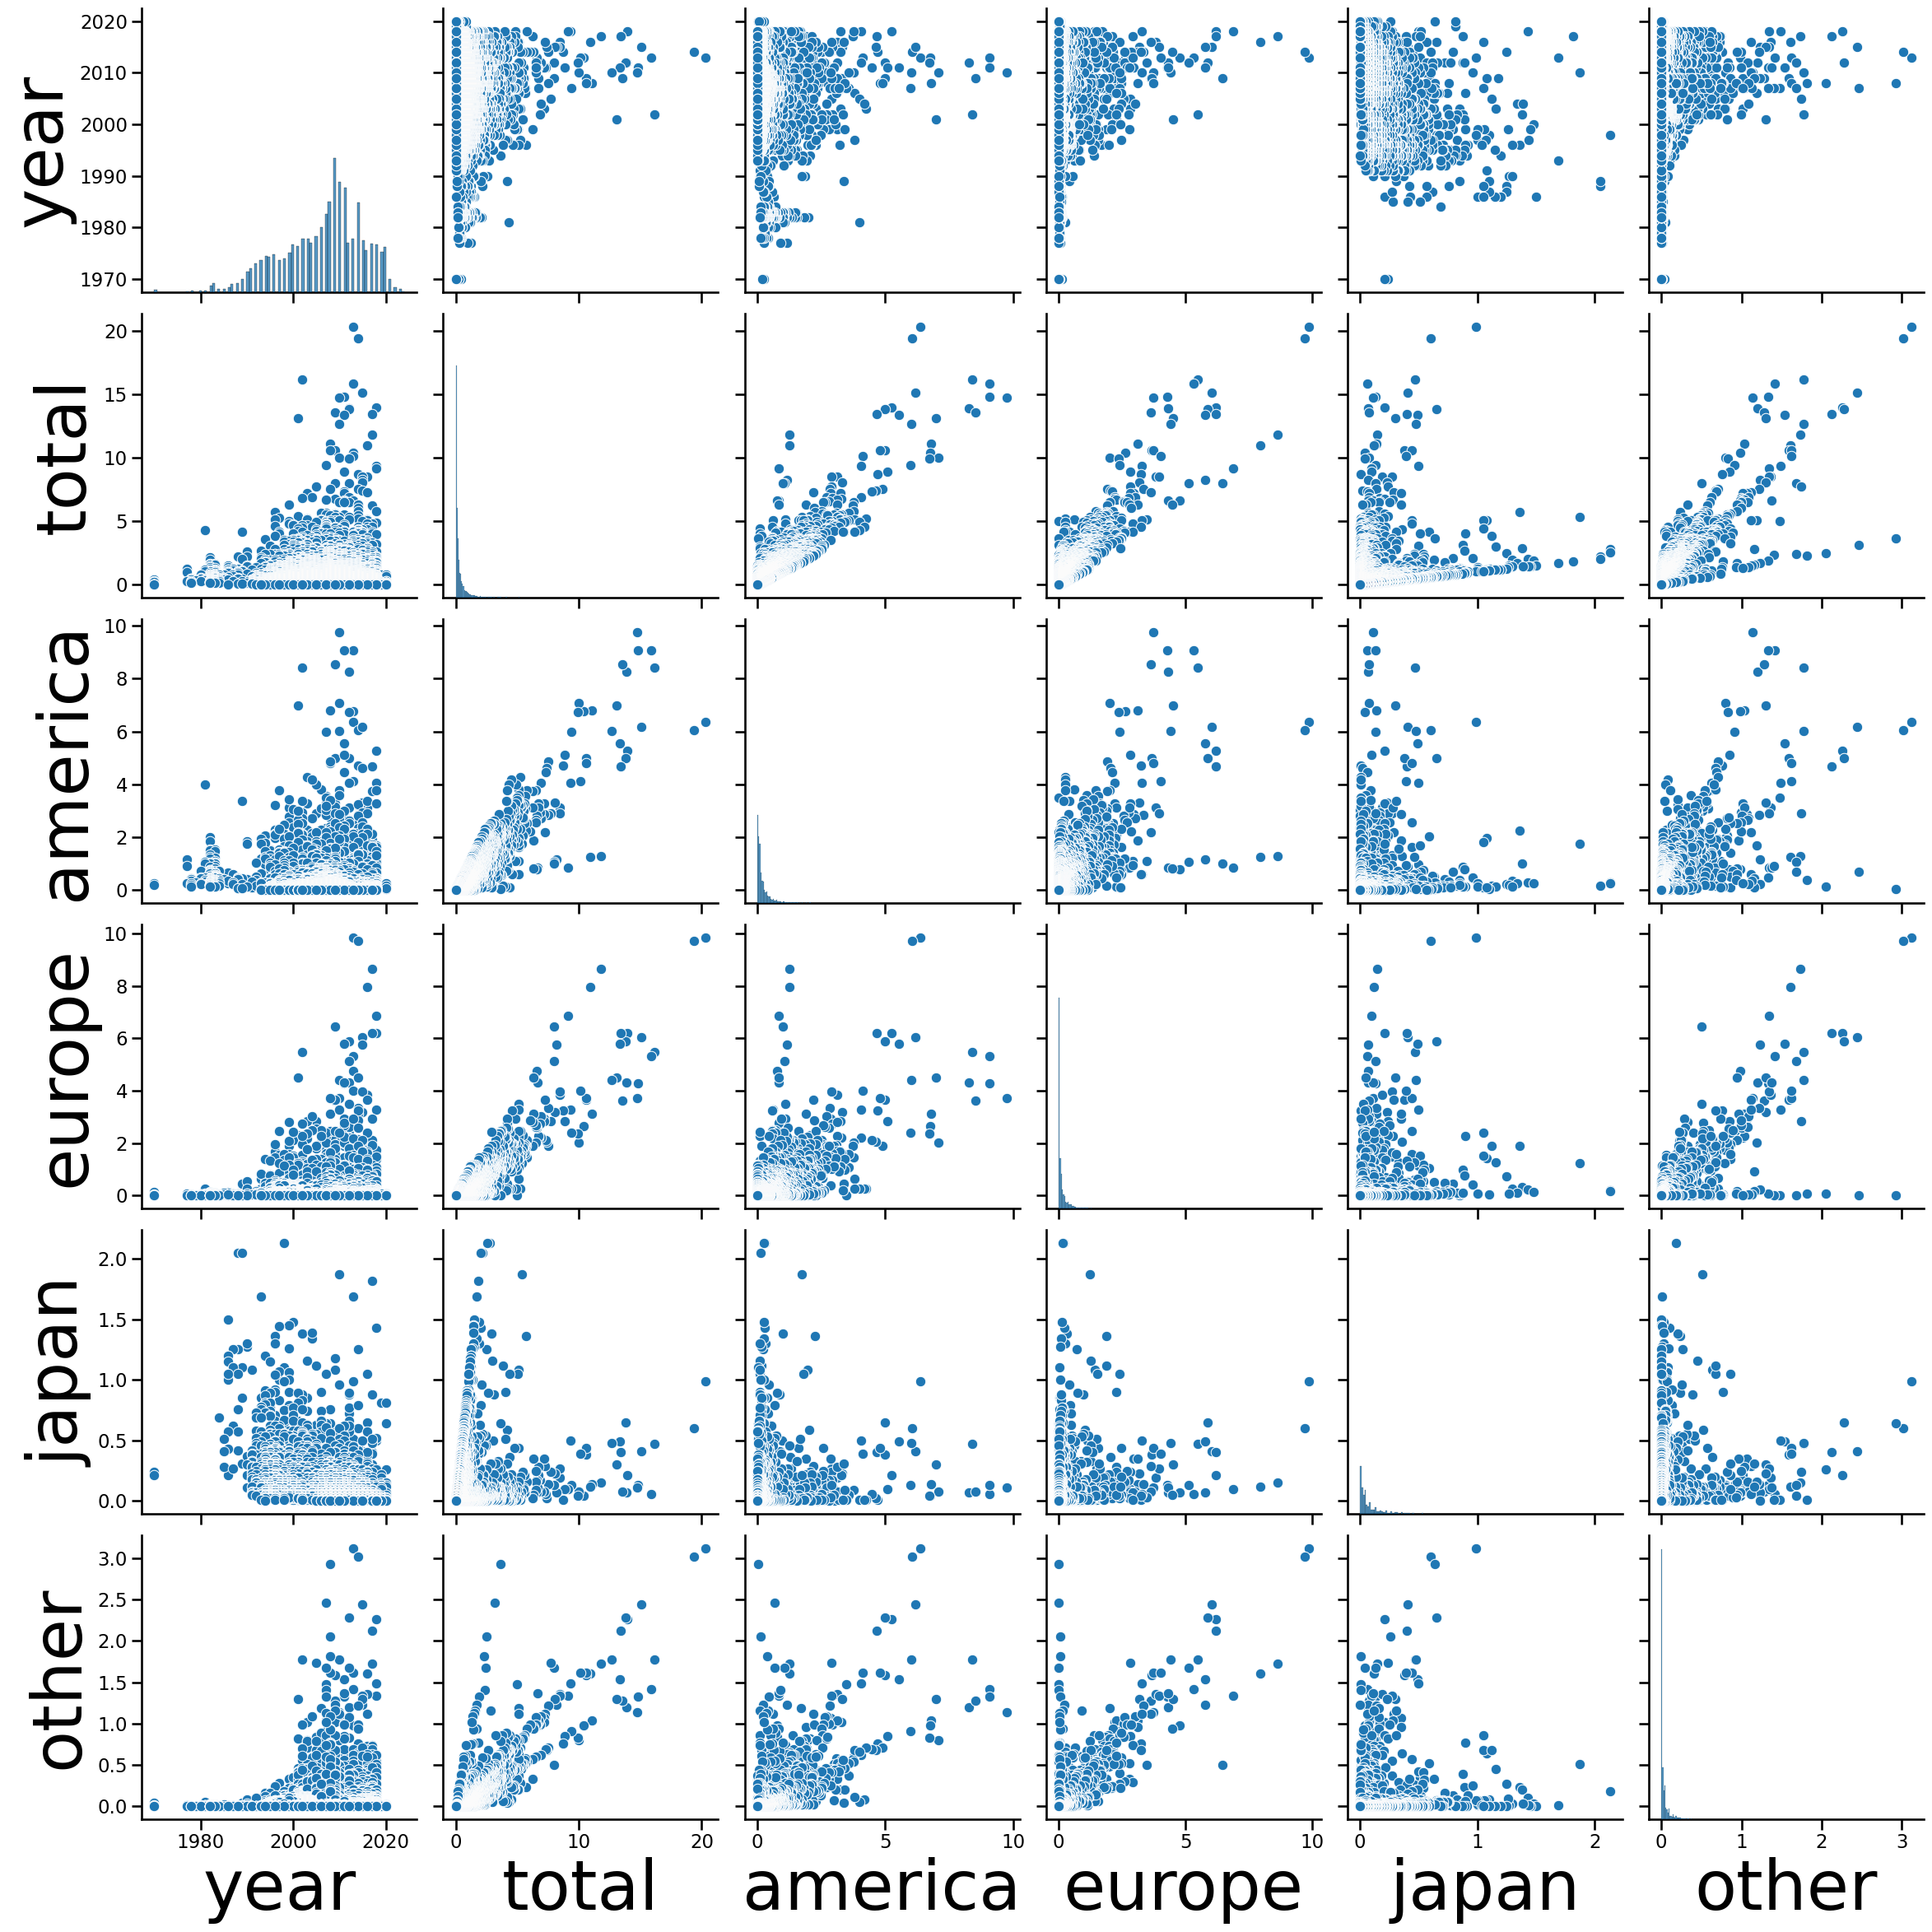

In [929]:
sb.pairplot(v2, aspect=1, height=4)
sb.set_context("talk", rc={"axes.labelsize": 60})
plt.show()

#### Only two countries in the dataset, america (US), and Japan. America started earlier and exploded faster, Japan had a great middle run
#### and while few japan outliers ruled the early era, americans are more prominent in modern times.

    4. on what day and month were the largest number of video games released? What could be the reason for this pattern?

In [930]:
v.insert(4, 'month', v['date'].dt.month_name())

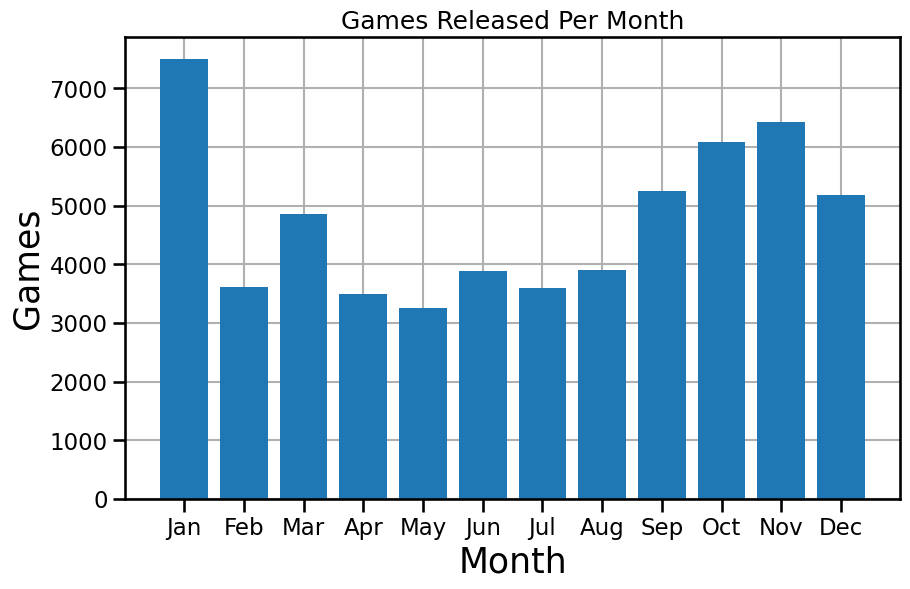

In [931]:
#Number of games by month
plt.figure(figsize=(10,6))
plt.bar(month.index,month.values)
plt.xlabel('Month', fontsize=25)
plt.ylabel('Games', fontsize=25)
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Games Released Per Month')
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.show()

In [932]:
#inserting day column to check day
v.insert(5, 'day', v['date'].dt.day)

In [933]:
#combining both, to check which day in which month has the biggest number of games released.
v3 = v.groupby(['month', 'day']).name.count()
v3 = v3.sort_values(ascending=False)
v3

month     day 
January   1.0     5236
December  1.0      986
November  1.0      497
December  31.0     495
October   1.0      476
                  ... 
January   3.0       43
          9.0       42
December  26.0      40
January   5.0       37
          6.0       34
Name: name, Length: 366, dtype: int64

New Year's Eve and various other holidays have the most games released.

    5.is there a dependence of the number of copies sold on the ratings of critics or users?

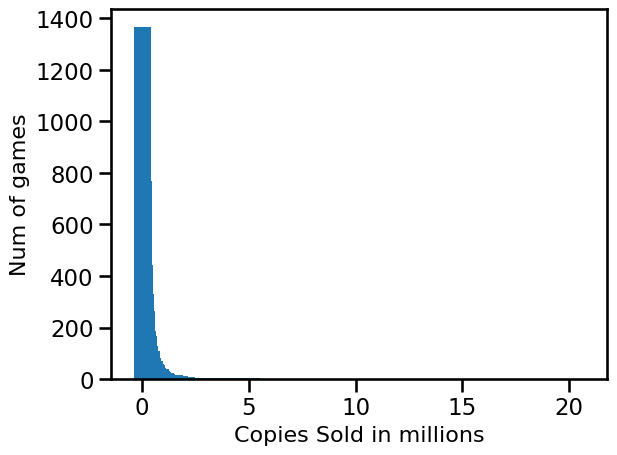

In [952]:
#calculating numbers of copies sold in general

t = v.groupby('total').total.count()
plt.bar(t.index, t.values)
plt.xlabel('Copies Sold in millions', fontsize=16)
plt.ylabel('Num of games', fontsize=16)
plt.show()

In [935]:
#high amount of copies sold

total = v[v.total > 2.00]
t1 = total[['name', 'total', 'critic', 'user']]
#creating dataset for high ratings
rating = t1[(t1.critic > 7.5) & (t1.user > 7.5)]
norating = t1[(t1.critic.isna()) &(t1.user.isna())]

In [956]:
#comparing the average of those with to those without high rating.
r =  rating.groupby('total').total.mean()
t2 = norating.groupby('total').total.mean()

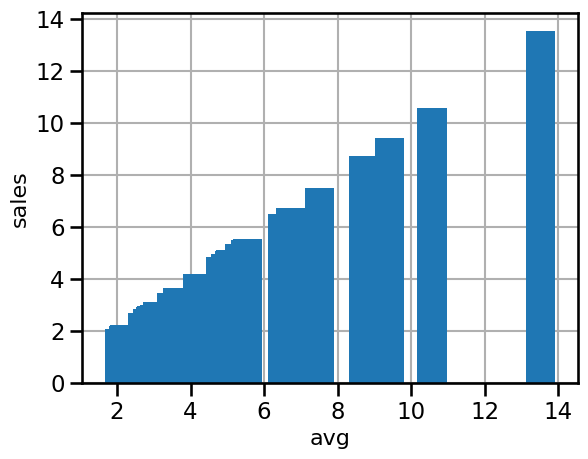

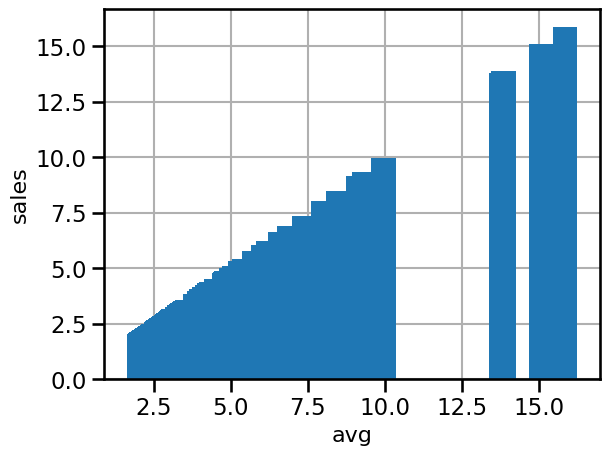

In [953]:
#visualizing rating vs no rating with graphs.
plt.figure(1)
plt.bar(r.index, r.values)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.xlabel('avg', fontsize=16)
plt.ylabel('sales', fontsize=16)
plt.figure(2)
plt.bar(t2.index, t2.values)
plt.grid(True)
plt.gca().set_axisbelow(True)
plt.xlabel('avg', fontsize=16)
plt.ylabel('sales', fontsize=16)
plt.show()

6. which gaming platforms, publishers and developers are the most common (the largest number of video games have been released over time)?
7. which gaming platforms, publishers and developers have the largest number of video game copies sold (over all time, the total number of copies sold was the largest)?

In [938]:
#changing a name to fit the graph
v.publisher = v.publisher.replace('Sony Computer Entertainment', 'Sony')

In [939]:
#counting the largest publishers, platforms, and developers by both number of games via count and copies sold via sum
pub = v.groupby('publisher').name.count().nlargest(10)
plat = v.groupby('platform').name.count().nlargest(10)
dev = v.groupby('developer').name.count().nlargest(10)
pubs = v.groupby('publisher').total.sum().nlargest(10)
plats = v.groupby('platform').total.sum().nlargest(10)
devs = v.groupby('developer').total.sum().nlargest(10)

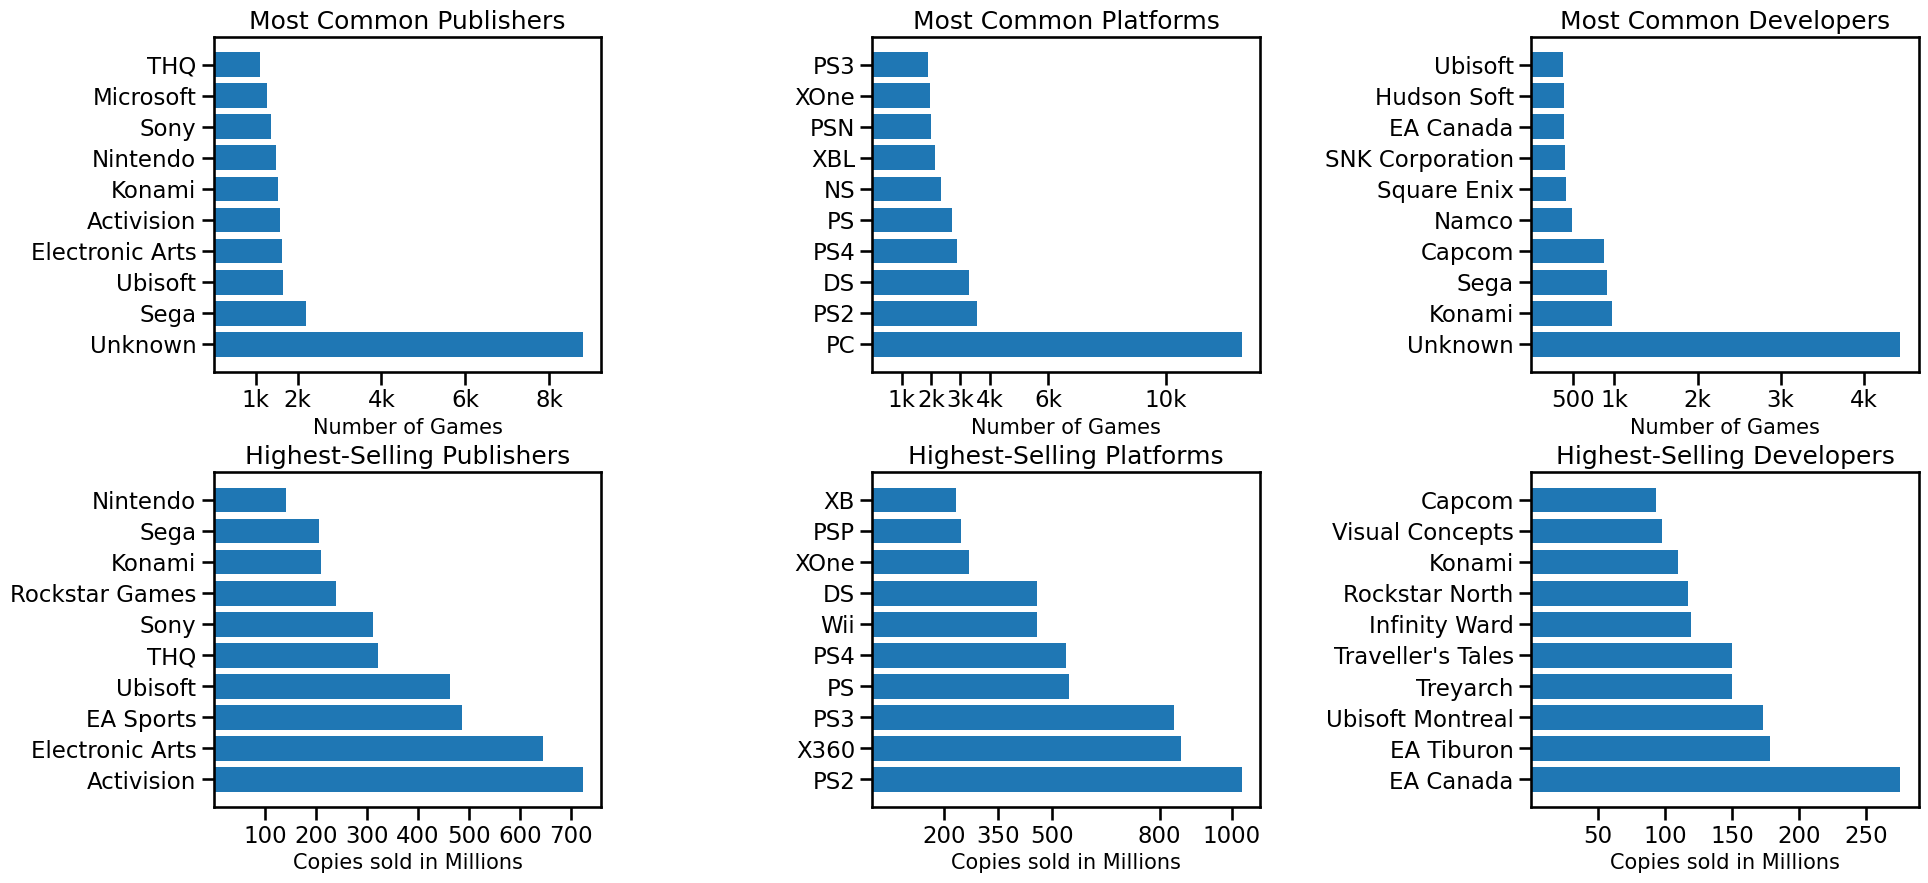

In [940]:
#plotting the graphs - 6 graphs, for each category
fig, ax = plt.subplots(2,3, figsize=(22,10))
ax[0,0].barh(pub.index, pub.values)
ax[0,0].set_title('Most Common Publishers')
ax[0,0].set_xticks(ticks=[1000,2000,4000,6000,8000], labels=['1k', '2k', '4k', '6k', '8k'])
ax[0,0].set_xlabel('Number of Games', fontsize=15)
ax[0,1].barh(plat.index, plat.values)
ax[0,1].set_title('Most Common Platforms')
ax[0,1].set_xticks(ticks=[1000,2000,3000,4000,6000,10000], labels=['1k', '2k', '3k', '4k', '6k','10k'])
ax[0,1].set_xlabel('Number of Games', fontsize=15)
ax[0,2].barh(dev.index, dev.values)
ax[0,2].set_title('Most Common Developers')
ax[0,2].set_xticks(ticks=[500,1000,2000,3000,4000], labels=['500','1k', '2k', '3k', '4k'])
ax[0,2].set_xlabel('Number of Games', fontsize=15)
ax[1,0].barh(pubs.index, pubs.values)
ax[1,0].set_title('Highest-Selling Publishers')
ax[1,0].set_xticks(ticks=[100,200,300,400,500,600,700])
ax[1,0].set_xlabel('Copies sold in Millions', fontsize=15)
ax[1,1].barh(plats.index, plats.values)
ax[1,1].set_title('Highest-Selling Platforms')
ax[1,1].set_xticks(ticks=[200,350,500,800,1000])
ax[1,1].set_xlabel('Copies sold in Millions', fontsize=15)
ax[1,2].barh(devs.index, devs.values)
ax[1,2].set_title('Highest-Selling Developers')
ax[1,2].set_xticks(ticks=[50,100,150,200,250])
ax[1,2].set_xlabel('Copies sold in Millions', fontsize=15)
plt.subplots_adjust(wspace=0.7, hspace=0.3)
plt.show()

## And Now, to my main research question:

In [941]:
#split the top 5000 best selling games to those developed or published by top publishers and independent games
v5 = v.nlargest(5000, columns=['total', 'year'])
pub5 = v5.groupby('publisher').name.count().nlargest(20)
indie = v5[(~v5.publisher.isin(pub5.index))&(~v5.developer.isin(pub5.index))]
indie.tail(50)

,name,date,platform,year,month,day,publisher,developer,shipped,total,america,europe,japan,other,vgc,critic,user
7907,Chicken Riot,2010-02-16,Wii,2010.0,February,16.0,City Interactive,City Interactive,NaN,0.33,0.14,0.16,NaN,0.03,NaN,NaN,NaN
7935,DECA Sports Freedom,2010-11-18,X360,2010.0,November,18.0,Hudson Soft,Hudson Soft,NaN,0.33,0.27,0.04,NaN,0.02,NaN,3.0,NaN
7936,Family Party: 90 Great Games Party Pack,2010-10-26,Wii,2010.0,October,26.0,D3 Publisher,D3 Publisher,NaN,0.33,0.31,0.00,NaN,0.02,NaN,NaN,NaN
7833,Night at the Museum: Battle of the Smithsonian,2009-05-05,DS,2009.0,May,5.0,Majesco,"Pipeworks Software, Inc.",NaN,0.33,0.12,0.18,NaN,0.04,NaN,NaN,NaN
7845,Ninja Blade,2009-04-07,X360,2009.0,April,7.0,Microsoft,From Software,NaN,0.33,0.14,0.14,0.02,0.03,NaN,6.7,NaN
7850,BookWorm,2009-12-08,DS,2009.0,December,8.0,PopCap Games,PopCap Games,NaN,0.33,0.30,0.01,NaN,0.02,NaN,NaN,NaN
7883,Scooby-Doo! First Frights,2009-09-22,PS2,2009.0,September,22.0,Warner Bros. Interactive,Torus Games,NaN,0.33,0.14,0.03,NaN,0.16,NaN,NaN,NaN
7897,Night at the Museum: Battle of the Smithsonian,2009-05-05,Wii,2009.0,May,5.0,Majesco,"Pipeworks Software, Inc.",NaN,0.33,0.17,0.13,NaN,0.03,NaN,NaN,NaN
7955,Discovery Kids: Puppy Playtime,2009-03-24,DS,2009.0,March,24.0,505 Games,505 Games,NaN,0.33,0.30,NaN,NaN,0.02,NaN,NaN,NaN
7937,Samurai Warriors 2: Xtreme Legends (JP sales),2008-03-18,PS2,2008.0,March,18.0,KOEI,Omega Force,NaN,0.33,NaN,NaN,0.33,NaN,NaN,NaN,NaN


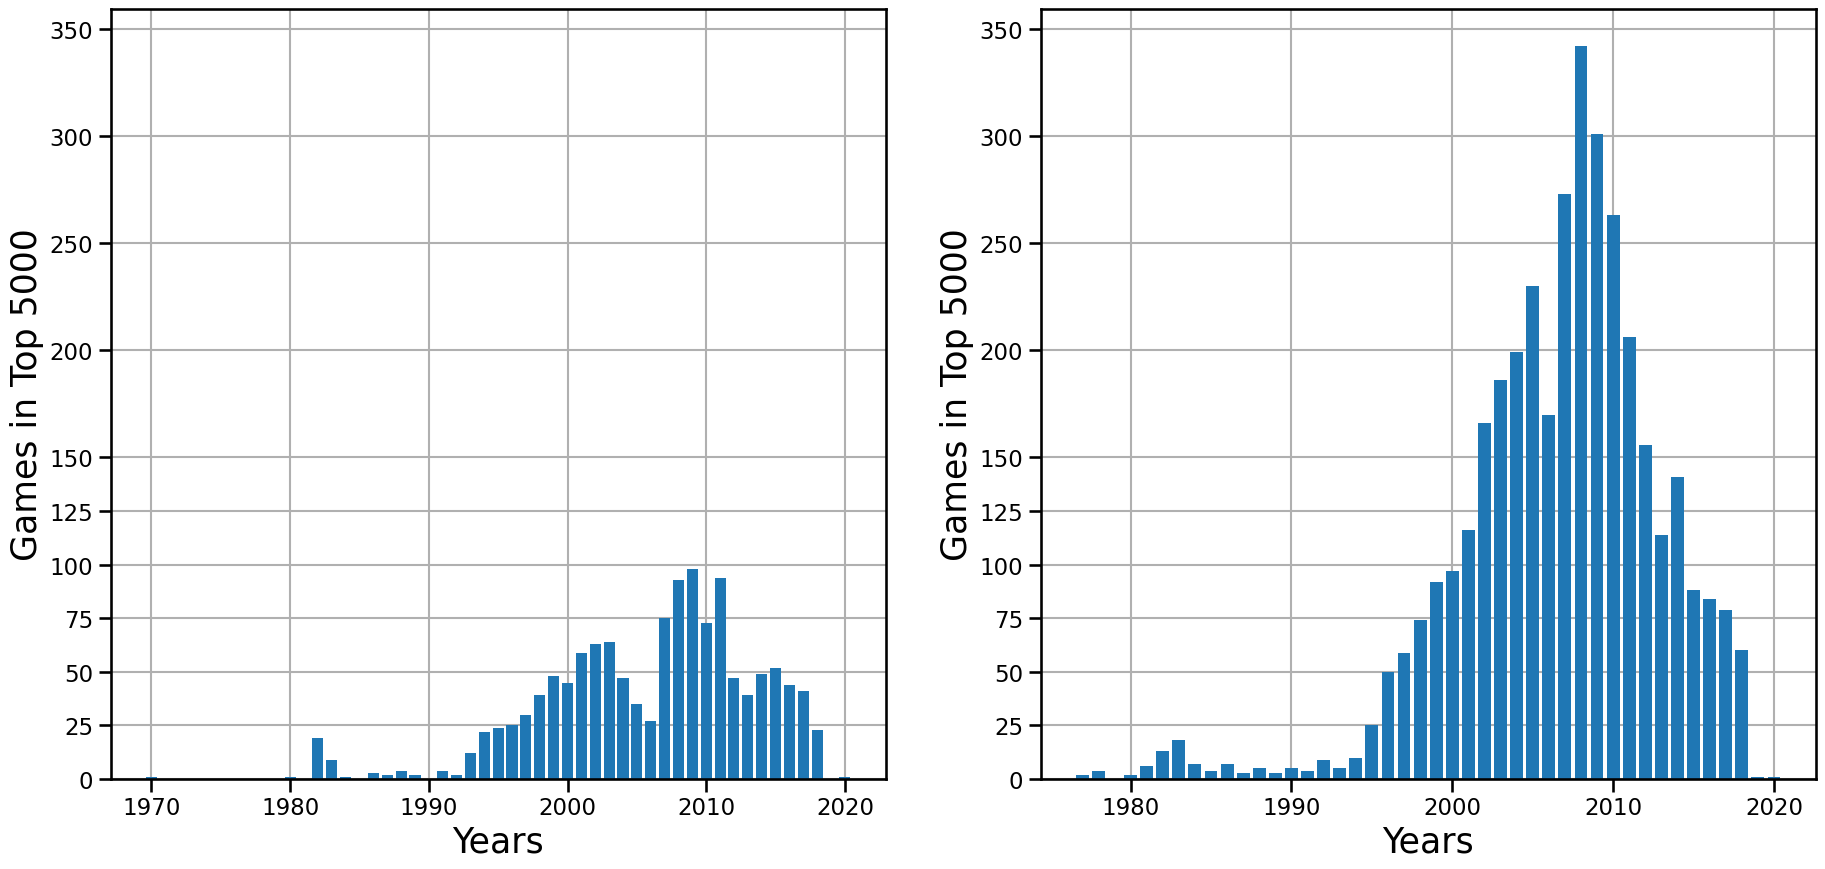

In [942]:
#creating plots for indie games and for top publisher games

i = indie.groupby('year').name.count()
fig, ax = plt.subplots(1,2, figsize=(22,10),sharey='row')
ax[0].set_yticks(ticks=[0, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350])
ax[0].bar(i.index, i.values)
v6 = v5[(v5.publisher.isin(pub5.index))|(v5.developer.isin(pub5.index))]
publishers = v6.groupby('year').name.count()
ax[1].bar(publishers.index, publishers.values)
ax[1].set_yticks(ticks=[0, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350])
ax[1].tick_params(labelleft=True)
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_axisbelow(True)
ax[1].set_axisbelow(True)
ax[0].set_xlabel('Years', fontsize=25)
ax[1].set_xlabel('Years', fontsize=25)
ax[0].set_ylabel('Games in Top 5000', fontsize=25)
ax[1].set_ylabel('Games in Top 5000', fontsize=25)
plt.show()

In [943]:
#calculating the percentage of indie games through the sum of publishers values in the series, and counted number of indies
publishers.sum() + indie.name.count()

np.int64(5000)

In [944]:
#calculating the percentage out of the top 5000
indiepct = 5000 / indie.name.count()
percentage = 100 / indiepct
percentage

np.float64(26.4)

# Conclusion: Being 26.36% of the best-selling games in a growing industry, independent games can succeed, just like publishers.